##### explore notebook--eda and transform
***

# Importing Libraries and Data

In [440]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reopening our cleaned dataframe

In [441]:
pd.set_option('display.max_columns', 999) # setting to view all columns

with open('data/data_b.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_b = pickle.load(f)
display(data_b.shape)
data_b.head()

(20606, 49)

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Baths_partial,Baths_1_plus,Baths_2_plus,Baths_3_plus,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014,221900.0,1180,5650,0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014,538000.0,2570,7242,0,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015,180000.0,770,10000,0,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014,604000.0,1960,5000,0,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015,510000.0,1680,8080,0,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Dataframe successfully imported from `pickle`.
***

# Questions

It's time to think about what we want to find out from this dataset. I am interested in learning the following:
1. Which variables show the strongest correlations with price?
2. Which variables (whether redundant or un - influential) can or should be eliminated toward building a predictive model for home price?
3. Can we make a reasonably compelling model without categorical data?
4. Does model effectiveness vary across zip codes?

# EDA

Before getting too deliberate, let's step backfor a fresh look at our data.

## Creating a visual for all prices in the dataframe

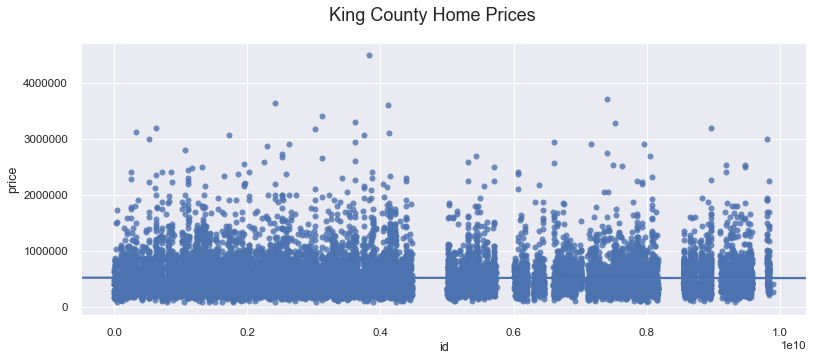

In [442]:
data = data_b

# create a figure
plt.figure(figsize=(13, 5)) # total figure size

# create a single subplot
plt.subplot(1,1,1)
sns.set(font_scale=1.05) # adjust for plot size

# plot correlation of price to itself with regression line
sns.regplot(x='id', y='price', data=data)
plt.suptitle("King County Home Prices", fontsize=18)

plt.show()

For the record, we are looking at thousands of homes, with most of their sale values close to .5 million and one lon.ely (though perhaps quite comfortable) well above 4 million

# Correlation with `price`

We are curious about what features are correlated with price, so let's look at a correlations table.

In [443]:
# viewing a kitchen sink of correlations
df_corr = data_b.corr()
df_corr

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,Renovated,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,Baths_partial,Baths_1_plus,Baths_2_plus,Baths_3_plus,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,1.000000,0.010051,-0.006075,0.002808,-0.130264,-0.005079,0.007021,-0.006027,0.029023,0.000355,0.025511,0.006792,-0.142099,-0.009430,0.004245,-0.022192,0.020675,-0.000117,-0.008435,-0.024828,0.023731,0.002267,-0.029898,-0.004199,0.035174,-0.000206,-0.004383,-0.008060,-0.015773,0.003421,0.017899,-0.013256,0.022181,0.003612,-0.010912,0.033321,-0.027300,-0.011296,-0.002995,-0.022432,-0.016959,-0.024155,0.041480,0.010402,-0.007804,-0.010151,-0.005119,0.003710
date,0.010051,1.000000,0.004211,-0.032108,0.004329,-0.003433,-0.027236,-0.012364,0.001047,-0.030317,-0.000042,-0.023371,-0.001378,-0.020331,0.007314,0.007449,-0.013841,0.001032,-0.002731,0.023382,-0.015086,-0.012779,0.025521,-0.005895,-0.019962,-0.007194,-0.005883,0.006457,-0.002268,0.002416,0.008056,-0.004602,-0.005404,0.003793,0.018235,0.028000,-0.006161,-0.045870,0.004441,0.010627,0.020574,0.014096,-0.007967,-0.019972,-0.015257,-0.006638,-0.002731,0.003728
price,-0.006075,0.004211,1.000000,0.654089,0.081221,0.237618,0.548014,0.276331,0.027806,0.346306,0.019108,0.582584,0.072758,0.121427,-0.148765,-0.166552,0.207736,0.145229,-0.029630,-0.314741,0.088844,0.376106,-0.258708,0.036327,0.226871,0.087287,0.014766,-0.000262,-0.345166,0.091869,0.151891,0.181015,0.284378,-0.019103,-0.053797,-0.008377,-0.022644,0.071633,-0.027427,-0.087475,-0.229002,-0.327987,0.045652,0.300047,0.360455,0.306050,0.213729,0.050021
sqft_living,0.002808,-0.032108,0.654089,1.000000,0.153906,0.081683,0.857385,0.386441,0.325135,0.038323,0.256358,0.760163,0.168490,0.043376,-0.379647,-0.259914,0.406605,0.272873,-0.056296,-0.546922,0.280721,0.440078,-0.368874,-0.051296,0.426485,0.067701,-0.075298,-0.009679,-0.239769,0.063965,0.125963,0.140669,0.140268,-0.032839,-0.060625,0.099059,-0.082878,-0.016177,-0.040718,-0.121388,-0.327711,-0.365858,0.113133,0.374461,0.372402,0.277665,0.154621,0.032670
sqft_lot,-0.130264,0.004329,0.081221,0.153906,1.000000,0.023196,0.165140,0.000873,0.044653,-0.092504,0.221507,0.139511,0.697433,0.005291,-0.024646,-0.006187,0.021967,0.004794,0.002235,-0.038827,0.001519,0.061484,-0.000679,0.015251,0.007350,0.004201,-0.047090,-0.005693,-0.063216,-0.007254,0.033206,0.074612,0.014045,0.006844,0.044284,-0.016055,0.018100,-0.016311,0.002872,0.021950,-0.016093,-0.060951,-0.018339,0.052662,0.075673,0.051201,0.046045,0.002397
waterfront,-0.005079,-0.003433,0.237618,0.081683,0.023196,1.000000,0.049242,0.068858,-0.028842,-0.016107,-0.042519,0.073021,0.036039,0.073903,0.023763,-0.004006,-0.011704,-0.002449,0.052727,-0.022497,-0.006007,0.039252,-0.013301,0.006109,0.007471,0.002475,0.006804,-0.001284,-0.237605,-0.003899,0.003476,0.046908,0.557056,0.016448,0.000867,-0.019071,0.013579,0.009206,-0.002031,0.005732,-0.004382,-0.038584,-0.010366,0.011681,0.045199,0.068016,0.080831,-0.000741
sqft_above,0.007021,-0.027236,0.548014,0.857385,0.165140,0.049242,1.000000,-0.135397,0.437105,-0.019920,0.364717,0.728096,0.180436,0.012861,-0.333101,-0.208023,0.373704,0.168493,-0.049274,-0.522406,0.302524,0.361337,-0.552871,-0.045975,0.595836,0.076773,-0.028590,-0.004123,-0.116519,0.016617,0.063791,0.071244,0.075562,-0.026834,-0.052913,0.197514,-0.144693,-0.092673,-0.033876,-0.099337,-0.287530,-0.393565,0.095027,0.395777,0.377556,0.279124,0.143819,0.038807
sqft_basement,-0.006027,-0.012364,0.276331,0.386441,0.000873,0.068858,-0.135397,1.000000,-0.152907,0.108572,-0.156034,0.160524,0.000240,0.058976,-0.133871,-0.125485,0.114491,0.216510,-0.019752,-0.115818,-0.000318,0.195761,0.275500,-0.017721,-0.240796,-0.007219,-0.093229,-0.011092,-0.248288,0.093224,0.123016,

Okay, so I am not sure what I thought I might see, there. ...Not a sight for sore eyes.

A problem with one - hot encoding is that it can complicate analysis. One example is the inability to determine whether `price` increases with the number of `bedrooms` when bedroom counts are spread - out over 4 separate columns.

Fortunately, we can acces our dataframe as it was preserved prior to one - hot encoding and explore relationships for the grouped categories.

In [444]:
with open('data/data_f_no_hots.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    no_hots_df = pickle.load(f)

display(no_hots_df.shape)
no_hots_df.head()

(20606, 22)

,id,date,price,bedrooms,bathrooms,Baths,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,2014,221900.0,3,1.00,1_plus,1180,5650,1.0,0,0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014,538000.0,3,2.25,2_plus,2570,7242,2.0,0,0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015,180000.0,2,1.00,1_plus,770,10000,1.0,0,0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014,604000.0,4,3.00,3_plus,1960,5000,1.0,0,0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015,510000.0,3,2.00,2_plus,1680,8080,1.0,0,0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0


## Answer 2.1

Even before discovering the answer to question 1, we have an early answer to our second question: We will not need that `Baths` column. It has already been encoded to `data_b`.

In [445]:
# remove the `Baths` column
no_hots_df.drop('Baths', axis=1, inplace=True)

In [512]:
# view info
no_hots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20533 entries, 0 to 21596
Data columns (total 21 columns):
id               20533 non-null int64
date             20533 non-null int32
price            20533 non-null float64
bedrooms         20533 non-null int64
bathrooms        20533 non-null float64
sqft_living      20533 non-null int64
sqft_lot         20533 non-null int64
floors           20533 non-null float64
waterfront       20533 non-null int64
view             20533 non-null int64
condition        20533 non-null int64
grade            20533 non-null int64
sqft_above       20533 non-null int64
sqft_basement    20533 non-null float64
yr_built         20533 non-null int64
zipcode          20533 non-null object
lat              20533 non-null float64
long             20533 non-null float64
sqft_living15    20533 non-null int64
sqft_lot15       20533 non-null int64
Renovated        20533 non-null int32
dtypes: float64(6), int32(2), int64(12), object(1)
memory usage: 3.3+ MB


> Making a note that `zipcode` is stored as an object.
I may use it in later grouping, but not as a predictor variable in general regression modeling.

### Viewing correlation data in plots

This should be easier to look at:

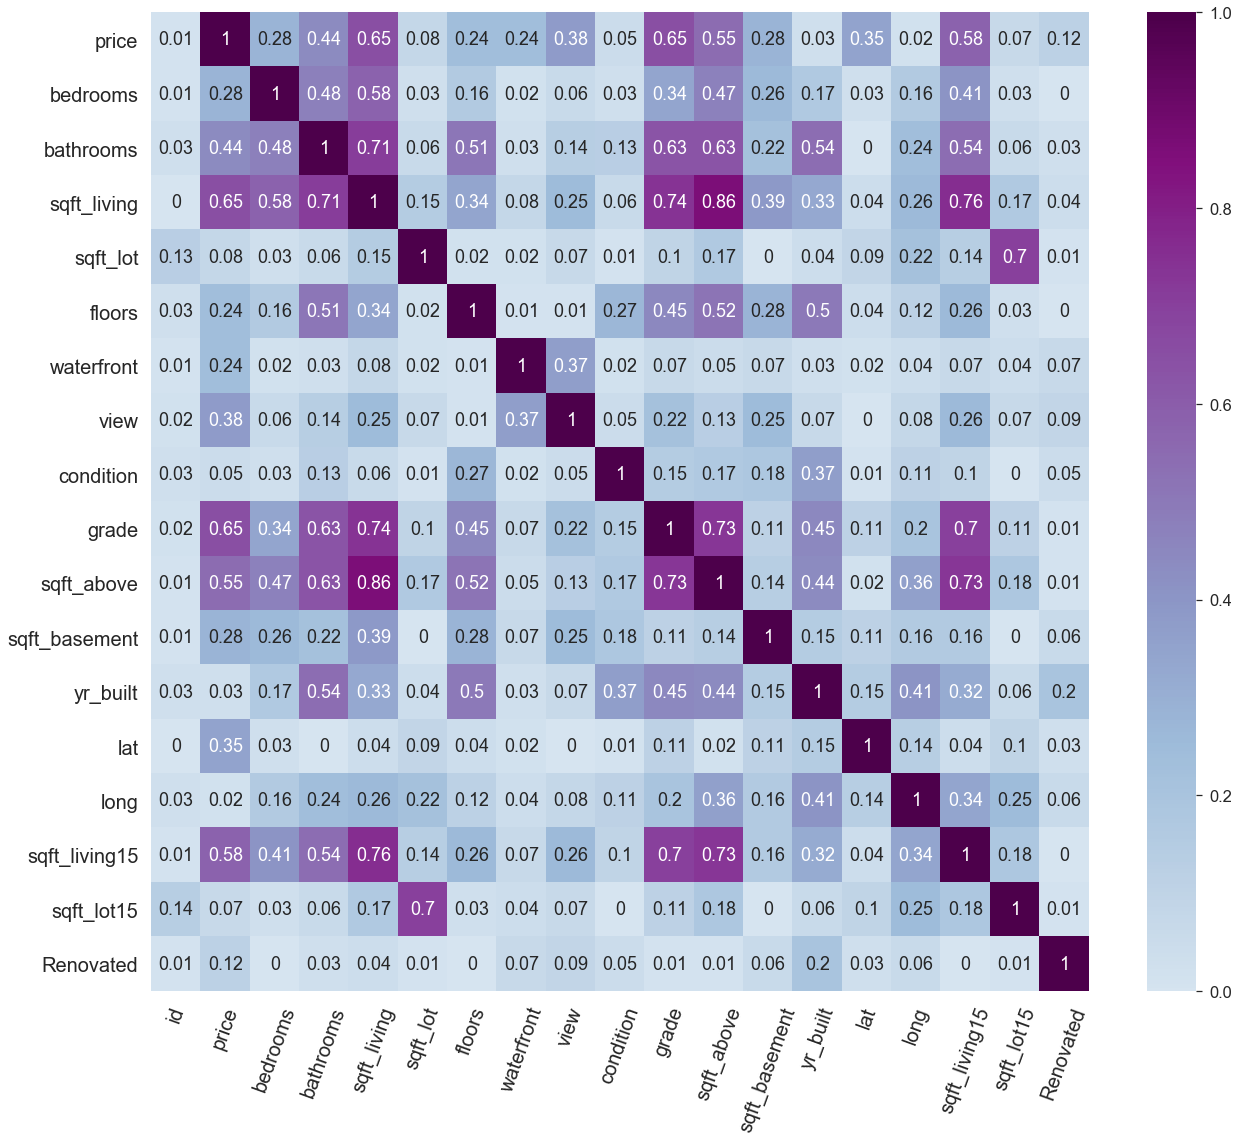

In [446]:
# create the correlations table
nh_corr = no_hots_df.drop('date', axis=1).corr()

# create a function to generate a heatmap
def plot_corr_heatmap(cor, cmap="BuPu"):
    # creating a figure to plot a heatmap from `no_hots_df` correlations
    plt.figure(figsize=(21,18))
    sns.set(font_scale=1.5, color_codes=True) # making annotations legible
    # plotting
    sns.heatmap(cor.round(2).drop(['id']).abs(), center=.4, annot=True, cmap="BuPu")
    plt.xticks(rotation = 70, fontsize=20)
    plt.yticks(fontsize=20)
    plt.autoscale()
    plt.show()

plot_corr_heatmap(nh_corr)

## Answer 1
### Strongest correlations
> Darker colors in the `price` column or row, starting with blue correlations above 0.3 are worth noting:
* The leaders are: `bathrooms`(.44), `sqft_living` (.65), `grade`(.65), `sqft_above`(.55), and `sqft_living15` (.58).
    * Square feet features are strong, out of the gate. Multicollinearity can be expected, however, for the three noted above.
* The variables `view`(.38) and `lat`(.35) are each in the next tier.
* The number of bathrooms has what might initially seem to be a surprising edge over bedrooms, but I suppose that is to be expected in homes with larger living/ entertainment spaces.
* On the other hand, renovations appear to have surprisingly low influence over price. Again, there may be simple explanations for that. Even before taking data normalization into consideration, I can imagine a fair number of homeowners renovating just to catch - up with the housing market.

### Data Distributions

Lets view each variable on its own.

#### Histograms

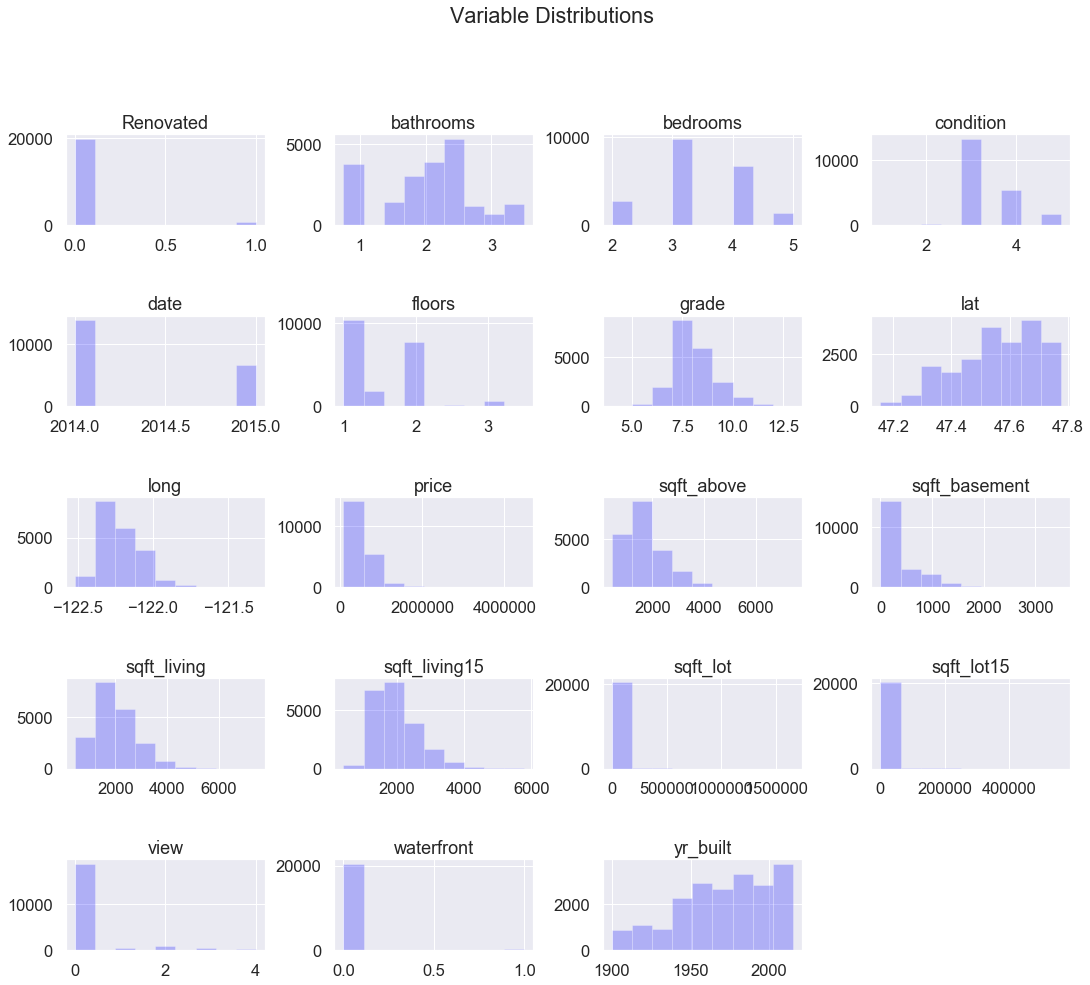

In [447]:
# selecting plot styling
plt.style.use('seaborn')
sns.set(font_scale=1.5)  # making labels legible

# plotting select columns in matplotlib without kde
no_hots_df.hist(figsize=(18, 15), bins=9,
            column=[col for col in no_hots_df.drop(['id'], axis=1).columns],
            alpha=.25, color='blue')  # Plot specific columns

plt.subplots_adjust(wspace=.35, hspace=1)
plt.suptitle('Variable Distributions', va='bottom')
plt.show()

* We can see `sqft` variables are positively skewed, but these are counts of unique values rather than binomial distribution residuals. At this point, we are still getting to know our data.
* `sqft_above`, `sqft_living`, and `sqft_living15` could almost be distortions of the same plot. We can anticipate the need to investigate and eliminate collinearity among predictor variables.

#### Viewing the same using iteratively generated distribution subplots with kde

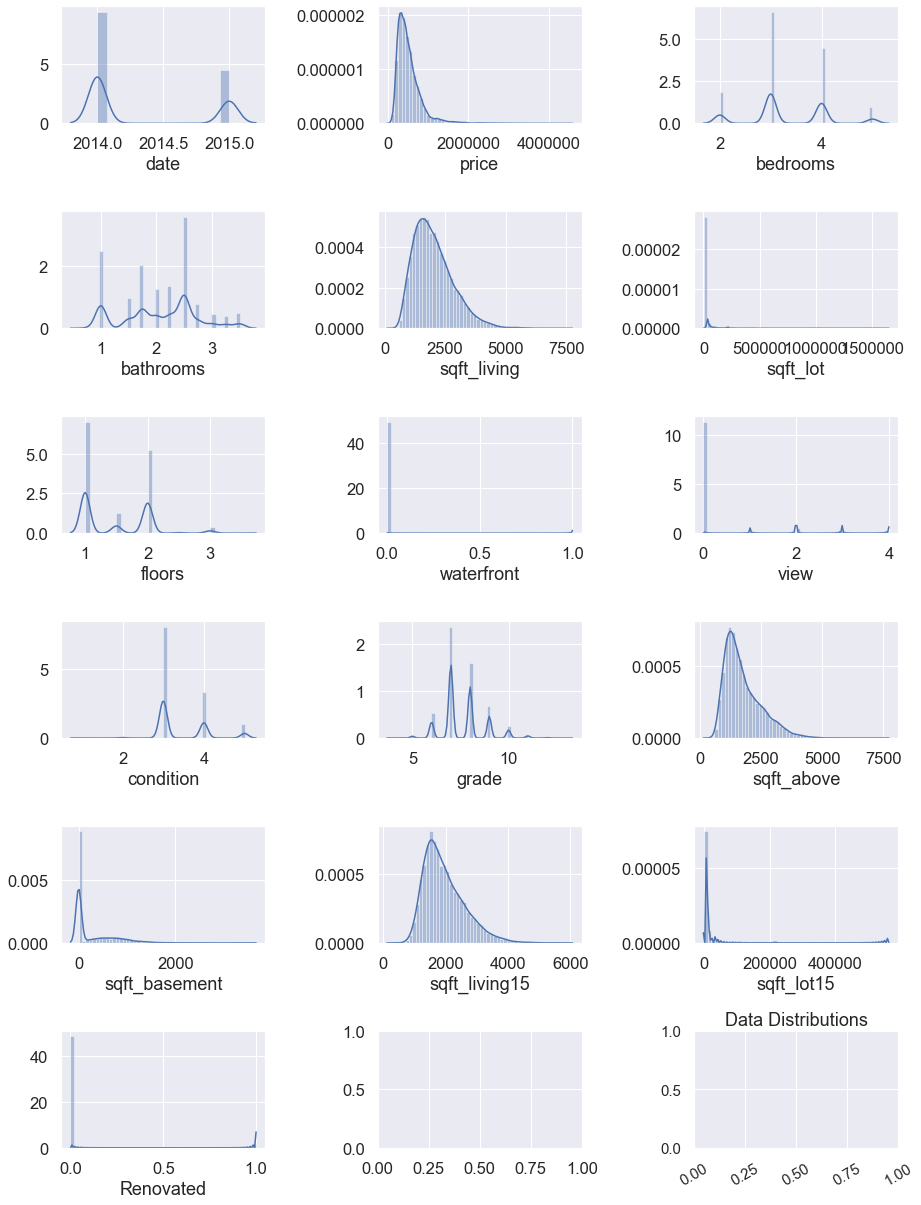

In [448]:
# select plot style
plt.style.use('seaborn')
sns.set(font_scale=1.5); # preventing overlap of long column names

# selecting columns excluding `id`
columns = no_hots_df.drop(['id', 'yr_built', 
                           'zipcode', 'lat', 
                           'long'], axis=1).columns

# setting a figure and number of axes to plot
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(15, 21))
plt.subplots_adjust(wspace=.55, hspace=.75) # space between subplots
plt.title("Data Distributions")

plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)

# flattening the list of axes and enumerating to associate each
# axis with the dataframe column in the same index position
for index, a in enumerate(ax.flatten()):
    if index < 16: # avoid error of indexes exceeding axes
        column = columns[index]
        # plot in seaborn including kde
        a = sns.distplot(no_hots_df[column], ax=a)

plt.show()


> We can make a couple of observations:
* We have a number of collinear variables, but we can work through some of that feature selection with validation, while building (and folding) models.
* The eyball sees that we coud conservatively addres much skewness in half of the 'sqft variables' (`sqft_living`, `sqft_above`, and `sqft_living15`) by cropping their values at a maximum of about 4000.
    * Let's describe them.

## `sqft` Outliers

In [449]:
# subset a dataframe of the three `sqft` columns from above
sqs = no_hots_df[[col for col in no_hots_df.columns if col.startswith(
    'sqft') and ('living' in col or 'above' in col)]]

# describe the subset
sqs.describe()

,sqft_living,sqft_above,sqft_living15
count,20606.00000,20606.000000,20606.000000
mean,2019.30991,1742.742793,1961.011987
std,806.92837,749.540819,651.280904
min,440.00000,440.000000,399.000000
25%,1420.00000,1190.000000,1480.000000
50%,1890.00000,1540.000000,1830.000000
75%,2480.00000,2150.000000,2330.000000
max,7420.00000,7420.000000,5790.000000


How many rows would be affected by dropping those with maximum values of 5000 or more for the columns in question?

In [454]:
sqs_5000 = sqs[sqs[col] >= 5000]
sqs_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1122 to 21524
Data columns (total 3 columns):
sqft_living      13 non-null int64
sqft_above       13 non-null int64
sqft_living15    13 non-null int64
dtypes: int64(3)
memory usage: 416.0 bytes


That does not seem too expensive. How would dropping these rows affect the column distributions?

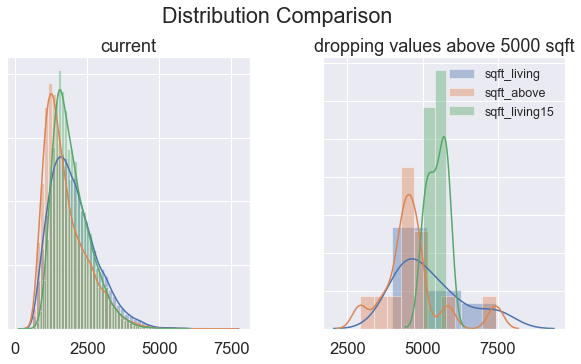

In [463]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
# sns.set(context='notebook', font_scale=1.35)

# give a little more space between the 'suptitle' and figugre
fig.suptitle("Distribution Comparison", y=1.02)
# and between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=5)

for col in sqs.columns:
    sns.distplot(sqs[col], ax=ax[0])
    ax[0].set_title('current')
    ax[0].set(xlabel='', yticklabels=[])
    
for col in sqs_5000.columns:
    sns.distplot(sqs_5000[col], ax=ax[1])
    ax[1].set_title('dropping values above 5000 sqft')
    ax[1].set(xlabel='', yticklabels=[])

plt.legend((sqs.columns[0], sqs.columns[1], sqs.columns[2]), fontsize='x-small')
plt.show()

It is interesting how the shapes of these distributions change with an adjustment the affects so few entries. We will move forward with these adjustments, for now.

In [456]:
# get the indexes for rows meeting the 'sqft' drop criteria
index_names = no_hots_df[(
    no_hots_df['sqft_living'] >= 5000) | (
    no_hots_df['sqft_above'] >= 5000) | (
    no_hots_df['sqft_living15'] >= 5000)].index

# delete these rows from the dataFrame
no_hots_df.drop(index_names , inplace=True)

In [459]:
# how many rows does that leave us
no_hots_df.shape

(20533, 21)

## Answer 2.2

Here, we have not dropped complete columns, but we have dropped outlier entries to help make some of our `sqft` variables more normal and therefore more capable of being useful to a linear regression model.

## Skew

We can use tolls to examine kurtosis, as we begin modeling. As for skewness--and we know we still have plenty of it--we can check that, right now.

In [532]:
for col in no_hots_df.columns:
        print (f"Skew in {col}:", no_hots_df[col].skew().round(3))

Skew in id: 0.233
Skew in date: 0.756
Skew in price: 2.493
Skew in bedrooms: 0.188
Skew in bathrooms: -0.068
Skew in sqft_living: 0.755
Skew in sqft_lot: 13.932
Skew in floors: 0.652
Skew in waterfront: 13.68
Skew in view: 3.603
Skew in condition: 1.038
Skew in grade: 0.67
Skew in sqft_above: 1.05
Skew in sqft_basement: 1.435
Skew in yr_built: -0.466
Skew in zipcode: 0.407
Skew in lat: -0.464
Skew in long: 0.881
Skew in sqft_living15: 0.923
Skew in sqft_lot15: 8.034
Skew in Renovated: 5.275


* The `sqft_lot` variables are off the rails.

We may have some log transformations, in our future.

***
### Assumptions for Linear Regression

- Linearity between target and predictor variables
    - Previewed above, but the scales may be a bit unbalanced, yet
- Normality of model residuals
    - Verify after building a baseline model
- Homoscedasticity: equal variability of a dependent variable across the values of an independent variable
    - Review after normalizing data
- Absence of, or minimal multicollinearity
    - We will need to select the best and discard the rest from multicollinear variables 

## Checking for Linearity

Let's see how independent variables relate to our target.

### Reviewing plots of predictor variables against the target


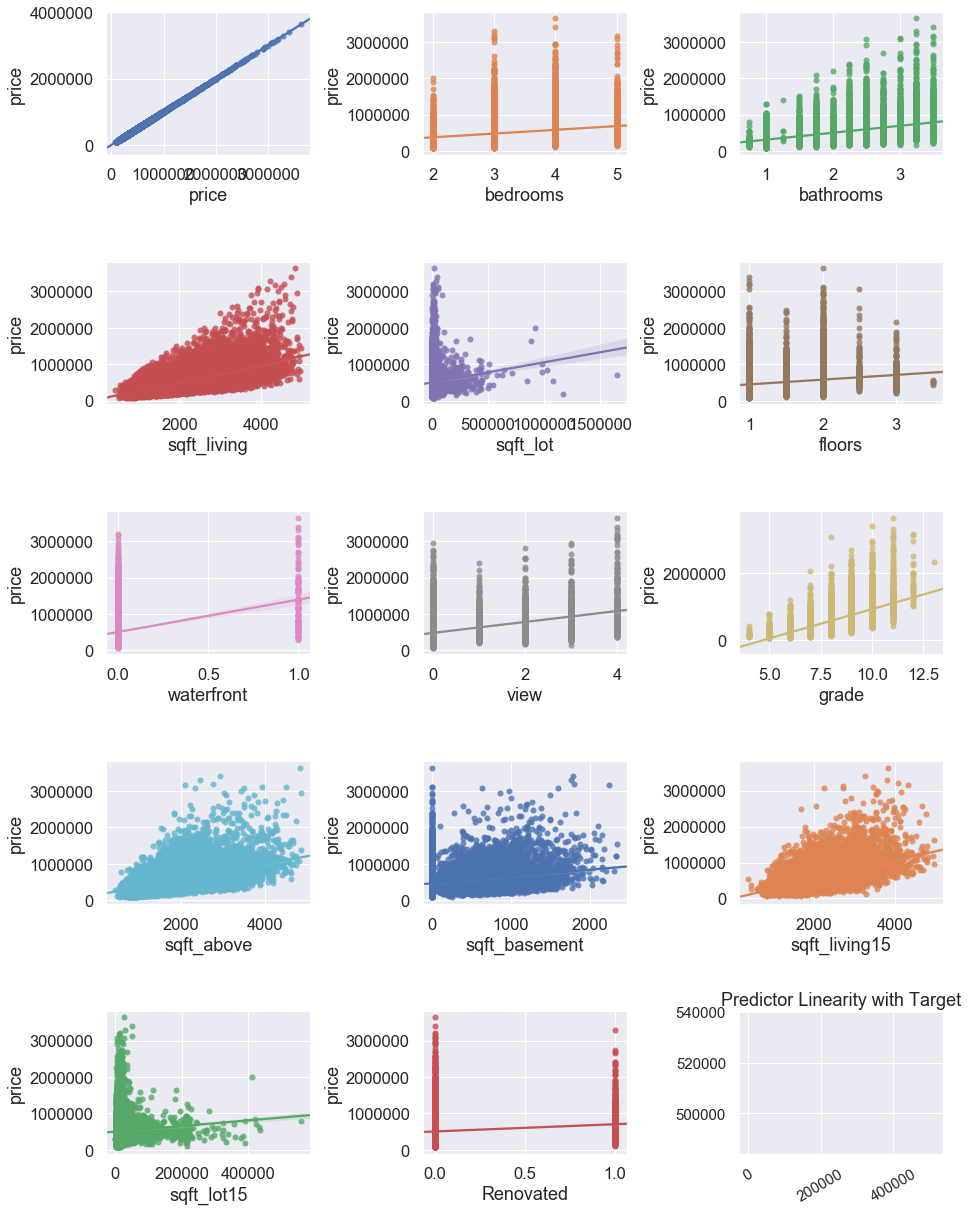

In [578]:
# select plot style
plt.style.use('seaborn')
sns.set(font_scale=1.5); # preventing overlap of long column names

# selecting columns excluding `id`
columns = no_hots_df.drop(['id', 'date', 
                           'zipcode', 'lat', 
                           'long'], axis=1).columns

# setting a figure and number of axes to plot
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(15, 21))
plt.subplots_adjust(wspace=.55, hspace=.75) # space between subplots
plt.title("Predictor Linearity with Target")

plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)

# flattening the list of axes and enumerating to associate each
# axis with the dataframe column in the same index position
for index, a in enumerate(ax.flatten()):
    if index < 14: # avoid error of indexes exceeding axes
        column = columns[index]
        # plot in seaborn including kde
        a = sns.regplot(data=no_hots_df, x=no_hots_df[column], y='price', ax=a)

plt.show()


We see many positive indicators among the variables. The regression line for `waterfront` against `price` looks almost as steep as the line for `grade`. Then again ...

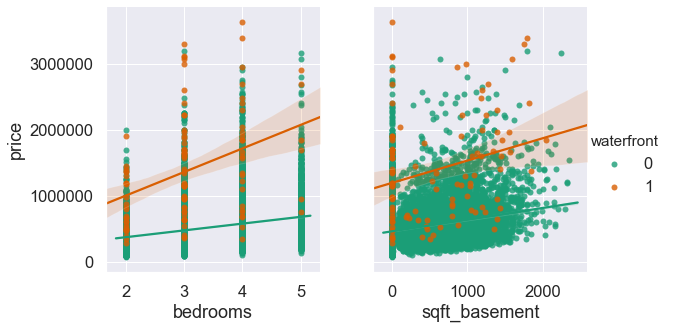

In [588]:
custom_palette = sns.color_palette("Dark2")
sns.pairplot(no_hots_df, x_vars=["bedrooms", "sqft_basement"], y_vars=["price"],
             hue="waterfront", palette=custom_palette, height=5, aspect=.8, kind="reg");

A spot on the waterfront comes at enough of a premium that it can significantly influence other variables.

In [589]:
# how many waterfront properties
no_hots_df.loc[no_hots_df['waterfront'] == 1, ['id']].count()

id    108
dtype: int64

There are only 108 properties on the waterfront, in this set of more than 20,000. Still, it has a significant effect on linear regression. One could argue that the entire category is an outlier. I think it is time to drop it.

* In addition, it looks like nearly every variable is correlated with price (`zipcode`, `date`, and `id` not counted as 'measures').
* We observe some linearity, and there are also many signs of heteroscedsticity, which would violate our assumptions for linear regression
* `Renovated`, `yr_built`, and `condition` look fairly weak as indicators. I am still interested in what the model may have to say about `Renovated`, but it is time to say farewell to `yr_built`, and `condition`.

#### Dropping `condition` , `waterfront`, and `yr_built`

In [596]:
no_hots_df.drop(['condition', 'waterfront', 'yr_built'], axis=1, inplace=True)

no_hots_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Renovated'],
      dtype='object')

## Answer 2.3

This time, we have dropped complete columns: one for its outsized influence and two others for their lack of correlation with the target as revealed via visual EDA.

## Pickle the current - state dataframe

Store the `no_hots_df` dataframe in a sub - directory of the repository as `no_hot_drops`.

In [ ]:
with open('data/no_hot_drops.pickle', 'wb') as f:
    # Pickling the 'no_hots_df' dataframe using the highest protocol available.
    pickle.dump(no_hots_df, f, pickle.HIGHEST_PROTOCOL)

### Continue to the next notebook



* Model and conclude

# Notes
***

In [600]:
# import gc
# gc.get_count()
# gc.collect()
# gc.get_count()

(38, 0, 0)

## Dealing with Outliers

In [109]:
from scipy import stats

### Taking a look at how far out our outliers are

In [ ]:
# creating a function to identify columns in a dataframe
# with values more than 3 standard deviations from the mean
def check_outliers(df, col):
    std_min = df[col].mean() - 3*df[col].std()
    std_max = df[col].mean() + 3*df[col].std()
    if df[col].min() < std_min or df[col].max() > std_max:
        print(f"\nValue in {col} exceeds +/- 3 standard deviations")
        print(f"column max: {df[col].max()}, std.dev. max: {std_max}")
        print(f"column mini: {df[col].min()}, std.dev. min: {std_min}")
        print("-"*72)

In [ ]:
# viewing pairwise relationships
sns.pairplot(no_hot_drops)

plt.show()

The pairplots give a feel for just how much of the data is categorical.

# parking lot:

> 

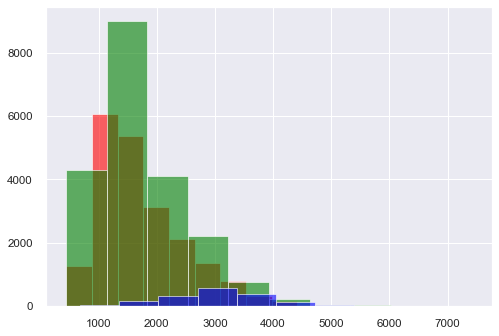

In [527]:
no_hots_df.sqft_above.hist(alpha=.6, color='red')
sqs.sqft_above.hist(alpha=.6, color='green')
sqs_3000.sqft_above.hist(alpha=.6, color='blue')

plt.show()

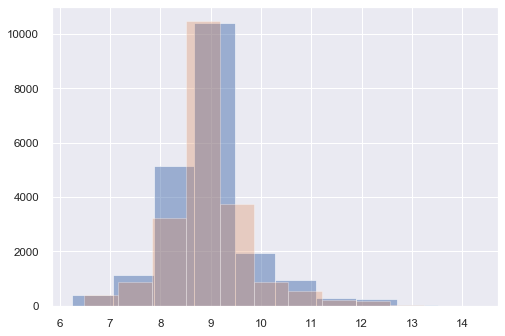

In [517]:
no_hots_df.sqft_lot.apply(np.log).hist(alpha=.5)
no_hots_df.sqft_lot15.apply(np.log).hist(alpha=.3)
plt.show()

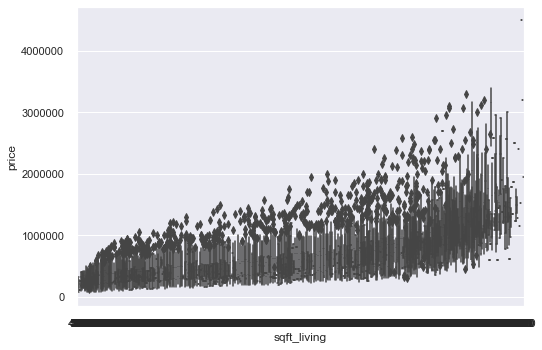

In [65]:
data = no_hots_df
sns.boxplot(y='price', x='sqft_living', data=data)
plt.show()

C:\Users\jd\Miniconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


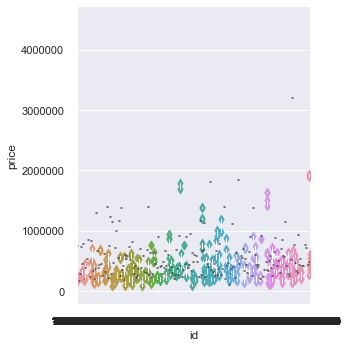

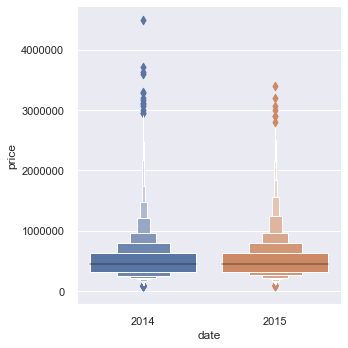

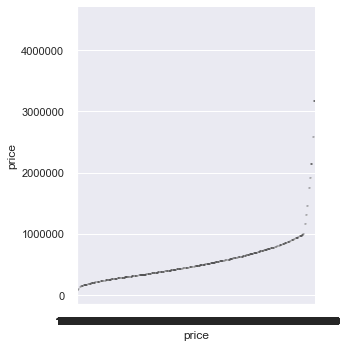

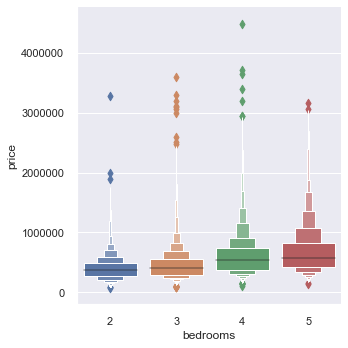

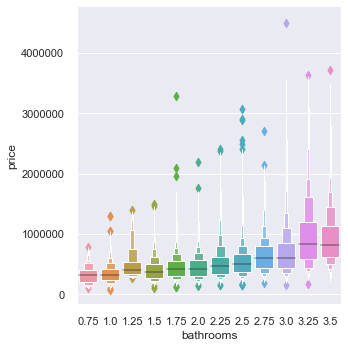

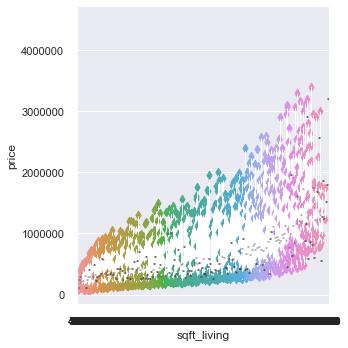

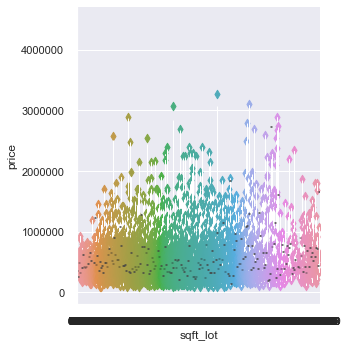

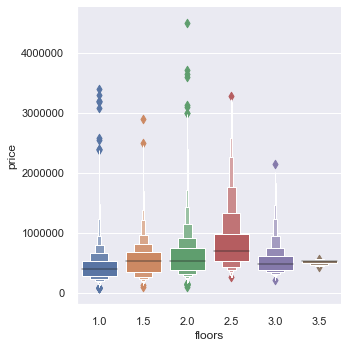

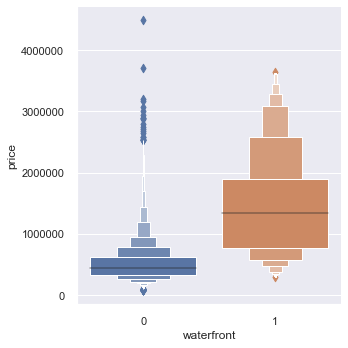

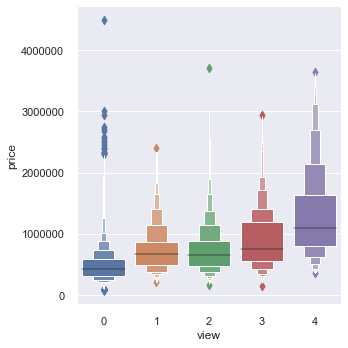

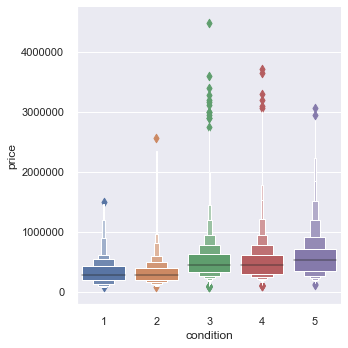

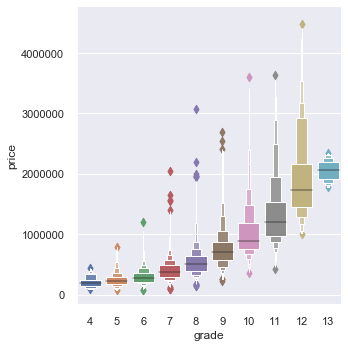

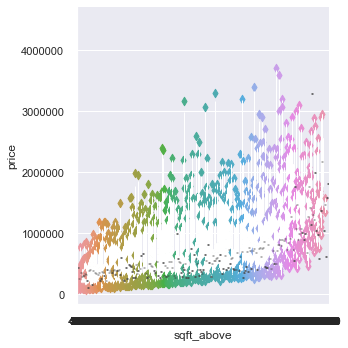

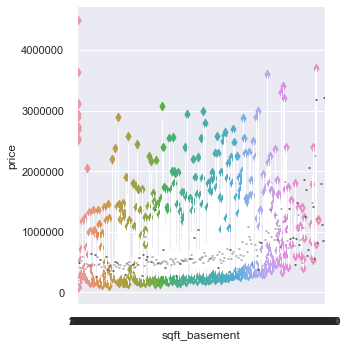

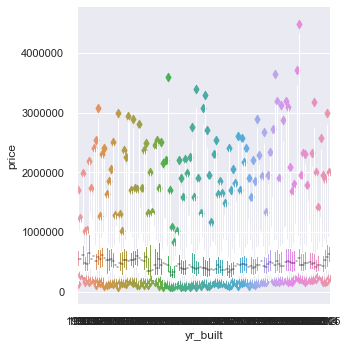

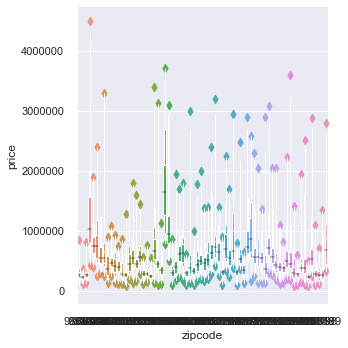

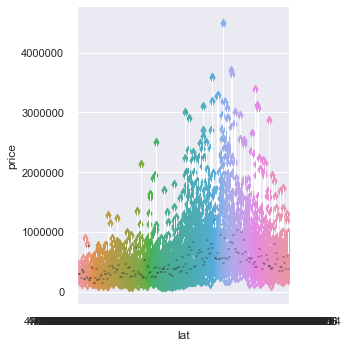

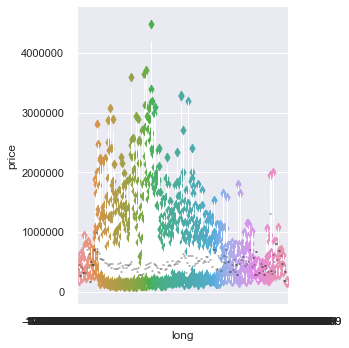

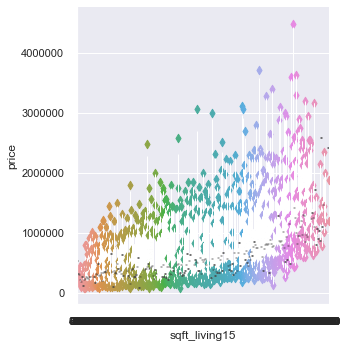

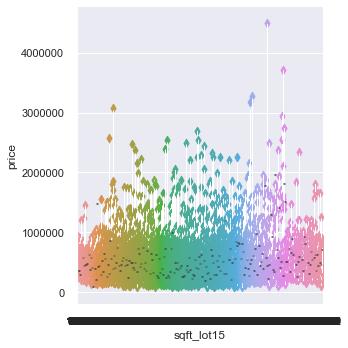

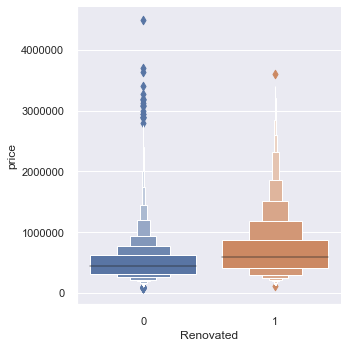

In [66]:
data=no_hots_df
sns.set(font_scale=1)

for col in no_hots_df.columns:
    sns.catplot(y='price', x=col, kind='boxen', data=data);
plt.show()

In [ ]:

plt.figure(figsize=(8,4))
plt.hist(target, color='orange')
plt.show()

